In [1]:
import pandas as pd
import os
from sklearn.impute import KNNImputer
import numpy as np
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
from data_functions import (
    scaling, 
    permutation_null_distro, 
    get_crit_val, 
    get_significant_components, 
    get_explained_ratio,
    task_transform_and_merge,
    questionnaire_transform_merge
    )

ImportError: cannot import name 'task_transform_and_merge' from 'data_functions' (/Users/mszdjh3/code/conilab/conilab/hcp-disease/data_functions.py)

In [ ]:
base_dir = os.path.join(os.environ['HOME'], 'data', 'HCP-disease', 'behavioural')
part = pd.read_csv("sub_ids/banda_id.csv")

In [ ]:
banda_key = pd.read_csv(os.path.join(base_dir, 'BANDA', 'tmp', 'BANDAinfocomplete.csv'))
banda_key['ALL_Data'] = banda_key['ALL_Data'].str.replace('_MR','')
banda_key = banda_key[['ALL_Data', 'phenotype', 'sex','interview_age']].rename(columns={"ALL_Data": "id"})

In [2]:
particpant_info = pd.merge(banda_key, part, left_on='id', right_on='part', how='right').drop('part', axis=1)

NameError: name 'banda_key' is not defined

In [6]:
banda_df = pd.read_excel(os.path.join(base_dir, 'BANDA', 'BehaviouralFiles.xlsx'), sheet_name=None)

## Revised Child Anxiety and Depression Scale

In [7]:
sub_scores = {
    "social_phobia": [4, 7, 8, 12, 20, 30, 32, 38, 43],
    "panic_disorder": [3, 14, 24, 26, 28, 34, 36, 39, 41],
    "maj_depression": [2, 6, 11, 15, 19, 21, 25, 29, 40, 47],
    "seperation_anxiety": [5, 9, 17, 18, 33, 45, 46],
    "general_anxiety": [1, 13, 22, 27, 35, 37],
    "ocd": [10, 16, 23, 31, 42, 44]
}

rdacs_score = {
    "Never": 0,
    "Sometimes": 1,
    "Often": 2,
    "Always": 3
}
rcads01 = banda_df["rcads01"][banda_df["rcads01"]['visit'] == 'T1']
rcads01 = rcads01.drop(rcads01[rcads01['src_subject_id'].duplicated()].index)
rcads_cols = rcads01.columns[8:]
scored_df = rcads01[rcads_cols].replace(rdacs_score)
scores = dict(zip([key for key in sub_scores], [[] for key in sub_scores]))
scores['particpant'] = rcads01['src_subject_id'].loc[1:]

for sub_scal in sub_scores:
    scores[sub_scal] = scored_df.loc[:, [f"rcads_{str(index)}" for index in sub_scores[sub_scal]]].sum(axis=1)

rcads_df = pd.DataFrame(
    data = scores
)
cols = rcads_df.columns.tolist()
cols = [cols[-1]] + cols[1:-1] + [cols[0]]
cols = cols[:1] + [cols[2]] + [cols[1]] + cols[3:]
rcads_df = rcads_df[cols]

try:
    del(rcads_df['internalising'])
    del(rcads_df['anxiety'])
except Exception as e:
    pass
rcads_df['internalising'] = rcads_df.iloc[:, 1:].sum(axis=1)
rcads_df['anxiety'] = rcads_df.iloc[:, 2:7].sum(axis=1)
rcads_df = rcads_df.rename(columns={"particpant": "id"})

/var/folders/4_/q2h2ppfd6ps35fw_6kl5x9m40000gr/T/ipykernel_86277/3019860684.py:19: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  scored_df = rcads01[rcads_cols].replace(rdacs_score)


In [7]:
rcads_df

,id,maj_depression,panic_disorder,seperation_anxiety,general_anxiety,ocd,social_phobia,internalising,anxiety
1,BANDA001,3.0,1.0,2.0,2.0,0.0,19.0,27.0,24.0
2,BANDA002,2.0,4.0,0.0,1.0,1.0,8.0,16.0,14.0
3,BANDA003,1.0,0.0,0.0,0.0,0.0,3.0,4.0,3.0
4,BANDA004,7.0,2.0,0.0,1.0,3.0,11.0,24.0,17.0
5,BANDA005,3.0,0.0,0.0,1.0,0.0,0.0,4.0,1.0
...,...,...,...,...,...,...,...,...,...
386,BANDA208,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
387,BANDA210,5.0,6.0,7.0,5.0,1.0,11.0,35.0,30.0
388,BANDA211,16.0,9.0,3.0,9.0,2.0,15.0,54.0,38.0
389,BANDA212,22.0,11.0,10.0,14.0,9.0,23.0,89.0,67.0


## Mood and Feelings Questionnaire

In [8]:
def nn(score) -> np.array:
    """
    Function wrapper around the 
    KNNImputer function in 
    sckit learn.

    Parameters
    ----------
    score: np.array
        array of values

    Returns
    -------
    np.array: array
        array of imputed 
        scores
    """
    return KNNImputer(
    missing_values=np.nan, 
    weights="uniform"
    ).fit_transform(score)

In [ ]:
for 

In [9]:
mfq01 = banda_df["mfq01"][banda_df["mfq01"]['visit'] == 'T1']
mfq01 = mfq01.drop(mfq01[mfq01['src_subject_id'].duplicated()].index)
mfq01 = pd.merge(mfq01.drop(["collection_id", "mfq01_id", "dataset_id", "subjectkey"], axis=1), particpant_info, left_on='src_subject_id', right_on='id')
mfq01 = mfq01.drop(["visit", "respondent", "collection_title", "Study", "id"], axis=1)

In [14]:
mfq01.columns[4: 37]

Index(['mfqc1_1', 'mfqc1_2', 'mfqc1_3', 'mfqc1_4', 'mfqc1_5', 'mfqc1_6',
       'mfqc2_1', 'mfqc2_2', 'mfqc2_3', 'mfqc2_4', 'mfqc2_5', 'mfqc2_6',
       'mfqc3_1', 'mfqc3_2', 'mfqc3_3', 'mfqc3_4', 'mfqc3_5', 'mfqc3_6',
       'mfqc4_1', 'mfqc4_2', 'mfqc4_3', 'mfqc4_4', 'mfqc4_5', 'mfqc4_6',
       'mfqc5_1', 'mfqc5_2', 'mfqc5_3', 'mfqc5_4', 'mfqc5_5', 'mfqc6_1',
       'mfqc6_2', 'mfqc6_3', 'mfqc6_4'],
      dtype='object')

In [10]:
mfq_cols = mfq01.columns[4: 37]
transformed_data = {}
groups = mfq01.groupby("phenotype")
for group_id in groups.groups.keys():
    group = groups.get_group(group_id)
    print(group_id)
    transformed = nn(group[mfq_cols])
    dataframe = pd.DataFrame(np.round(transformed)).sum(axis=1)
    transformed_data[group_id] = pd.concat([group[['src_subject_id', "phenotype"]].reset_index(drop=True), 
         dataframe.reset_index(drop=True)], axis=1)


mfg_score = pd.concat([transformed_data['Control'], transformed_data['Anxiety'], transformed_data['Depression']]).sort_values("src_subject_id")
mfg_score = mfg_score.rename(columns={"src_subject_id": "id", 0: "mfg_score"}).sort_values(by='id')

Anxiety
Control
Depression


In [11]:
import pandas as pd
import numpy as np

def questionnaire_transform_merge(
        input_df: pd.DataFrame, 
        participant_info: pd.DataFrame, 
        id_column: str, 
        score_name: str, 
        column_list: list):
    """
    Function to transform and merge HCP tasks 
    of the HCP pipeline. Assumes
    HCP style naming

    Parameters
    -----------
    input_df: pd.DataFrame
         Input dataframe
    participant_info: pd.DataFrame 
        A seperate dataframe DataFrame 
        containing participant information
    id_column: str
        The column representing unique subject IDs
    score_name: str: 
        The name of the transformed score column
    column_list: list
        List of columns to use for transformation

    Returns
    --------
    variable_df_score: pd.DataFrame
        Transformed and merged DataFrame
    """
    
    variable_df = input_df[input_df['visit'] == 'T1'].drop_duplicates(subset=['src_subject_id'])
    variable_df = pd.merge(
        variable_df.drop(["collection_id", id_column, "dataset_id", "subjectkey"], axis=1),
        participant_info, 
        left_on='src_subject_id', 
        right_on='id'
    ).drop(["visit", "respondent", "collection_title", "Study", "id"], axis=1)

    transformed_data = {}
    groups = variable_df.groupby("phenotype")

    for group_id, group in groups:
        transformed = nn(group[column_list])  
        dataframe = pd.DataFrame(np.round(transformed)).sum(axis=1)  
        
        transformed_data[group_id] = pd.concat(
            [group[['src_subject_id', "phenotype"]].reset_index(drop=True), dataframe.reset_index(drop=True)], 
            axis=1
        )

    variable_df_score = pd.concat(
        [transformed_data[g] for g in ['Control', 'Anxiety', 'Depression'] if g in transformed_data]
    ).sort_values("src_subject_id")

    return variable_df_score.rename(columns={"src_subject_id": "id", 0: score_name}).sort_values(by='id')


In [12]:
questionnaire_transform_merge(banda_df['mfq01'], particpant_info, 'mfq01_id', 'mfg_score', mfq01.columns[4: 37])

,id,phenotype,mfg_score
0,BANDA001,Control,37.0
1,BANDA002,Control,39.0
2,BANDA003,Control,33.0
3,BANDA004,Control,37.0
4,BANDA005,Control,33.0
...,...,...,...
75,BANDA210,Anxiety,38.0
59,BANDA211,Depression,79.0
60,BANDA212,Depression,80.0
61,BANDA213,Depression,77.0


In [13]:
mfg_score

,id,phenotype,mfg_score
0,BANDA001,Control,37.0
1,BANDA002,Control,39.0
2,BANDA003,Control,33.0
3,BANDA004,Control,37.0
4,BANDA005,Control,33.0
...,...,...,...
75,BANDA210,Anxiety,38.0
59,BANDA211,Depression,79.0
60,BANDA212,Depression,80.0
61,BANDA213,Depression,77.0


## Snaith-Hamilton Pleasure Scale

In [16]:
banda_df["shaps01"].columns[4: 18]

Index(['src_subject_id', 'interview_date', 'interview_age', 'sex', 'shaps1',
       'shaps2', 'shaps3', 'shaps4', 'shaps5', 'shaps6', 'shaps7', 'shaps8',
       'shaps9', 'shaps10'],
      dtype='object')

In [18]:
shaps_cols

Index(['shaps1', 'shaps2', 'shaps3', 'shaps4', 'shaps5', 'shaps6', 'shaps7',
       'shaps8', 'shaps9', 'shaps10', 'shaps11', 'shaps12', 'shaps13',
       'shaps14'],
      dtype='object')

In [17]:
shaps01 = banda_df["shaps01"][banda_df["shaps01"]['visit'] == 'T1']
shaps01 = shaps01.drop(shaps01[shaps01['src_subject_id'].duplicated()].index)
shaps01 = pd.merge(shaps01.drop(["collection_id", "shaps01_id", "dataset_id", "subjectkey"], axis=1), particpant_info, left_on='src_subject_id', right_on='id')
shaps01 = shaps01.drop(["visit", "respondent", "collection_title", "Study", "id"], axis=1)
shaps_cols = shaps01.columns[4: 18]
transformed_data = {}
groups = shaps01.groupby("phenotype")
for group_id in groups.groups.keys():
    group = groups.get_group(group_id)
    print(group_id)
    transformed = nn(group[shaps_cols])
    dataframe = pd.DataFrame(np.round(transformed)).sum(axis=1)
    transformed_data[group_id] = pd.concat([group[['src_subject_id', "phenotype"]].reset_index(drop=True), 
         dataframe.reset_index(drop=True)], axis=1)
shaps01_score = pd.concat([transformed_data['Control'], transformed_data['Anxiety'], transformed_data['Depression']]).sort_values("src_subject_id")
shaps01_score = shaps01_score.rename(columns={"src_subject_id": "id", 0: "shaps_score"}).sort_values(by='id')

Anxiety
Control
Depression


## State-Trait Anxiety Inventory (STAI)

In [286]:
state_cols = [col for col in banda_df["stai01"].columns if "Right now" in str(banda_df["stai01"].loc[0, col])]
trait_cols = [col for col in banda_df["stai01"].columns if "Generally" in str(banda_df["stai01"].loc[0, col])]

In [287]:
stai01 = banda_df["stai01"][banda_df["stai01"]['visit'] == 'T1']
stai01 = stai01.drop(stai01[stai01['src_subject_id'].duplicated()].index)
stai01 = pd.merge(stai01.drop(["collection_id", "stai01_id", "dataset_id", "subjectkey"], axis=1), particpant_info, left_on='src_subject_id', right_on='id')
stai01 = stai01.drop(["visit", "respondent", "collection_title", "Study", "id"], axis=1)

In [288]:
transformed_data = {}
groups = stai01.groupby("phenotype")
for group_id in groups.groups.keys():
    group = groups.get_group(group_id)
    print(group_id)
    transformed = nn(group[state_cols])
    dataframe = pd.DataFrame(np.round(transformed)).sum(axis=1)
    transformed_data[group_id] = pd.concat([group[['src_subject_id', "phenotype"]].reset_index(drop=True), 
         dataframe.reset_index(drop=True)], axis=1)
stai01_state = pd.concat([transformed_data['Control'], transformed_data['Anxiety'], transformed_data['Depression']]).sort_values("src_subject_id")
stai01_state = stai01_state.rename(columns={"src_subject_id": "id", 0: "state_val"}).sort_values(by='id')

Anxiety
Control
Depression


In [289]:
transformed_data = {}
groups = stai01.groupby("phenotype")
for group_id in groups.groups.keys():
    group = groups.get_group(group_id)
    print(group_id)
    transformed = nn(group[trait_cols])
    dataframe = pd.DataFrame(np.round(transformed)).sum(axis=1)
    transformed_data[group_id] = pd.concat([group[['src_subject_id', "phenotype"]].reset_index(drop=True), 
         dataframe.reset_index(drop=True)], axis=1)
stai01_trait = pd.concat([transformed_data['Control'], transformed_data['Anxiety'], transformed_data['Depression']]).sort_values("src_subject_id")
stai01_trait = stai01_trait.rename(columns={"src_subject_id": "id", 0: "trait_val"}).sort_values(by='id')

Anxiety
Control
Depression


In [290]:
stai01_score = pd.concat([stai01_state, stai01_trait['trait_val']], axis=1)
stai01_score

,id,phenotype,state_val,trait_val
0,BANDA001,Control,42.0,47.0
1,BANDA002,Control,46.0,41.0
2,BANDA003,Control,49.0,44.0
3,BANDA004,Control,47.0,45.0
4,BANDA005,Control,42.0,33.0
...,...,...,...,...
75,BANDA210,Anxiety,54.0,52.0
59,BANDA211,Depression,56.0,60.0
60,BANDA212,Depression,61.0,67.0
61,BANDA213,Depression,56.0,65.0


## Tasks


In [291]:
er = banda_df['er4001'][["src_subject_id", "er40_c_cr", "er40_c_rtcr"]]
er = er.drop(er[er['src_subject_id'].duplicated()].index)
er = pd.merge(er, particpant_info, left_on='src_subject_id', right_on='id')
transformed_data = {}
groups = er.groupby("phenotype")
for group_id in groups.groups.keys():
    group = groups.get_group(group_id)
    print(group_id)
    transformed = nn(group[["er40_c_cr", "er40_c_rtcr"]])
    dataframe = pd.DataFrame(np.round(transformed)).rename(columns={
        0: "er40_c_cr",
        1: "er40_c_rtcr"
    })
    transformed_data[group_id] = pd.concat([group[['src_subject_id', "phenotype"]].reset_index(drop=True), 
         dataframe.reset_index(drop=True)], axis=1)
er_score = pd.concat([transformed_data['Control'], transformed_data['Anxiety'], transformed_data['Depression']]).sort_values("src_subject_id")
er_score = er_score.rename(columns={"src_subject_id": "id"}).sort_values(by='id')

Anxiety
Control
Depression


In [292]:
banda_df['lswmt01']['tbx_ls'].isna().sum()

5

In [293]:
pcps = banda_df['pcps01'][["src_subject_id", "nih_patterncomp_ageadjusted"]]
pcps = pcps.drop(pcps[pcps['src_subject_id'].duplicated()].index)
pcps = pd.merge(pcps, particpant_info, left_on='src_subject_id', right_on='id')
transformed_data = {}
groups = pcps.groupby("phenotype")
for group_id in groups.groups.keys():
    group = groups.get_group(group_id)
    print(group_id)
    transformed = nn(group[["nih_patterncomp_ageadjusted"]])
    dataframe = pd.DataFrame(np.round(transformed)).rename(columns={
        0: "nih_patterncomp_ageadjusted",
    })
    transformed_data[group_id] = pd.concat([group[['src_subject_id', "phenotype"]].reset_index(drop=True), 
         dataframe.reset_index(drop=True)], axis=1)
pcps_score = pd.concat([transformed_data['Control'], transformed_data['Anxiety'], transformed_data['Depression']]).sort_values("src_subject_id")
pcps_score = pcps_score.rename(columns={"src_subject_id": "id"}).sort_values(by='id')

Anxiety
Control
Depression


In [ ]:
def transform_and_merge(
        input_df: pd.DataFrame, 
        input_column: str, 
        participant_info: pd.DataFrame):
    """
    Function to transform and merge certain
    meterics of the HCP pipeline. Assumes
    HCP style naming

    Parameters
    ------------
    input_df: pd.DataFrame
         Input dataframe
    input_column: str
         The column to transform
    participant_info: pd.DataFrame 
        A seperate dataframe DataFrame 
        containing participant information

    Returns
    --------
    variable_df_score: pd.DataFrame
        Transformed and merged DataFrame
    """
    variable_df = input_df[["src_subject_id", input_column]].drop_duplicates(subset=['src_subject_id'])
    variable_df = pd.merge(variable_df, participant_info, left_on='src_subject_id', right_on='id')

    transformed_data = {}
    groups = variable_df.groupby("phenotype")

    for group_id, group in groups:
        transformed = nn(group[[input_column]])
        dataframe = pd.DataFrame(np.round(transformed), columns=[input_column])
        transformed_data[group_id] = pd.concat(
            [group[['src_subject_id', "phenotype"]].reset_index(drop=True), dataframe.reset_index(drop=True)], axis=1
        )

    variable_df_score = pd.concat(
        [transformed_data[group] for group in ['Control', 'Anxiety', 'Depression'] if group in transformed_data]
    ).sort_values("src_subject_id")

    return variable_df_score.rename(columns={"src_subject_id": "id"}).sort_values(by='id')

In [334]:
pcps

,src_subject_id,nih_patterncomp_ageadjusted,id,phenotype,sex,interview_age
0,BANDA001,93,BANDA001,Control,F,184
1,BANDA002,136,BANDA002,Control,F,169
2,BANDA003,123,BANDA003,Control,M,177
3,BANDA004,125,BANDA004,Control,M,188
4,BANDA005,99,BANDA005,Control,M,191
...,...,...,...,...,...,...
195,BANDA208,116,BANDA208,Anxiety,M,169
196,BANDA210,91,BANDA210,Anxiety,M,193
197,BANDA211,133,BANDA211,Depression,F,196
198,BANDA212,87,BANDA212,Depression,F,186


In [333]:
transform_and_merge(banda_df['pcps01'], "nih_patterncomp_ageadjusted", particpant_info)

Anxiety
Control
Depression


,id,phenotype,nih_patterncomp_ageadjusted
0,BANDA001,Control,93.0
1,BANDA002,Control,136.0
2,BANDA003,Control,123.0
3,BANDA004,Control,125.0
4,BANDA005,Control,99.0
...,...,...,...
74,BANDA208,Anxiety,116.0
75,BANDA210,Anxiety,91.0
58,BANDA211,Depression,133.0
59,BANDA212,Depression,87.0


In [ ]:
transform_and_merge_2(banda_df["flanker01"], particpant_info, 'shaps01_id', 'nih_flanker_ageadjusted', shaps01.columns[4: 18])

In [326]:
flank_score

,id,phenotype,nih_flanker_ageadjusted
0,BANDA001,Control,98.0
1,BANDA002,Control,115.0
2,BANDA003,Control,87.0
3,BANDA004,Control,138.0
4,BANDA005,Control,92.0
...,...,...,...
74,BANDA208,Anxiety,94.0
75,BANDA210,Anxiety,77.0
58,BANDA211,Depression,90.0
59,BANDA212,Depression,105.0


In [37]:
flank = banda_df['flanker01'][["src_subject_id", "nih_flanker_ageadjusted"]]
flank = flank.drop(flank[flank['src_subject_id'].duplicated()].index)
flank = pd.merge(flank, particpant_info, left_on='src_subject_id', right_on='id')
transformed_data = {}
groups = flank.groupby("phenotype")
for group_id in groups.groups.keys():
    group = groups.get_group(group_id)
    print(group_id)
    transformed = nn(group[["nih_flanker_ageadjusted"]])
    dataframe = pd.DataFrame(np.round(transformed)).rename(columns={
        0: "nih_flanker_ageadjusted",
    })
    transformed_data[group_id] = pd.concat([group[['src_subject_id', "phenotype"]].reset_index(drop=True), 
         dataframe.reset_index(drop=True)], axis=1)
flank_score = pd.concat([transformed_data['Control'], transformed_data['Anxiety'], transformed_data['Depression']]).sort_values("src_subject_id")
flank_score = flank_score.rename(columns={"src_subject_id": "id"}).sort_values(by='id')

Anxiety
Control
Depression


In [297]:
lswmt = banda_df['lswmt01'][["src_subject_id", "tbx_ls"]]
lswmt = lswmt.drop(lswmt[lswmt['src_subject_id'].duplicated()].index)
lswmt = pd.merge(lswmt, particpant_info, left_on='src_subject_id', right_on='id')
transformed_data = {}
groups = lswmt.groupby("phenotype")
for group_id in groups.groups.keys():
    group = groups.get_group(group_id)
    print(group_id)
    transformed = nn(group[["tbx_ls"]])
    dataframe = pd.DataFrame(np.round(transformed)).rename(columns={
        0: "tbx_ls",
    })
    transformed_data[group_id] = pd.concat([group[['src_subject_id', "phenotype"]].reset_index(drop=True), 
         dataframe.reset_index(drop=True)], axis=1)
lswmt_score = pd.concat([transformed_data['Control'], transformed_data['Anxiety'], transformed_data['Depression']]).sort_values("src_subject_id")
lswmt_score = lswmt_score.rename(columns={"src_subject_id": "id"}).sort_values(by='id')

Anxiety
Control
Depression


## Overall df

In [298]:
print(stai01_score.shape)
print(shaps01_score.shape)
print(mfg_score.shape)
print(rcads_df.shape)
print(pcps_score.shape)
print(flank_score.shape)
print(er_score.shape)
print(lswmt_score.shape)


(202, 4)
(201, 3)
(202, 3)
(201, 9)
(200, 3)
(200, 3)
(202, 4)
(200, 3)


In [299]:
er_score

,id,phenotype,er40_c_cr,er40_c_rtcr
0,BANDA001,Control,37.0,2000.0
1,BANDA002,Control,34.0,1898.0
2,BANDA003,Control,39.0,1907.0
3,BANDA004,Control,36.0,1773.0
4,BANDA005,Control,39.0,1813.0
...,...,...,...,...
75,BANDA210,Anxiety,37.0,2075.0
59,BANDA211,Depression,33.0,1570.0
60,BANDA212,Depression,36.0,2044.0
61,BANDA213,Depression,37.0,1476.0


In [300]:
from functools import reduce

dfs = [stai01_score[['id', 'state_val', 'trait_val']], 
       shaps01_score[['id', 'shaps_score']], 
       mfg_score[['id','mfg_score']], 
       rcads_df[['id', 'internalising']],
       pcps_score[['id', 'nih_patterncomp_ageadjusted']],
       flank_score[['id', 'nih_flanker_ageadjusted']],
       er_score[['id', 'er40_c_cr', 'er40_c_rtcr']],
       lswmt_score[['id', 'tbx_ls']]
       
       ,]  # list of DataFrames
merged_df = reduce(lambda left, right: pd.merge(left, right, on='id', how='outer'), dfs)
try:
    del banda_df_scored
except Exception:
    pass
banda_df_scored = pd.merge(particpant_info, merged_df, how='outer')

In [ ]:
grouping = banda_df_scored.groupby("phenotype")
try:
     del(transformed_final)
except Exception:
     pass
transformed_final = {}
for group_id in grouping.groups.keys():
    df = grouping.get_group(group_id)
    for col in df.columns[4:]:
         mean_value = df[col].mean(skipna=True)
         df.loc[df[col].isna(), col] = mean_value
         transformed_final[group_id] = df

In [302]:
banda_df_scored = pd.concat([transformed_final['Control'], transformed_final['Anxiety'], transformed_final['Depression']]).sort_values("id")

In [303]:
banda_df_scored.columns

Index(['id', 'phenotype', 'sex', 'interview_age', 'state_val', 'trait_val',
       'shaps_score', 'mfg_score', 'internalising',
       'nih_patterncomp_ageadjusted', 'nih_flanker_ageadjusted', 'er40_c_cr',
       'er40_c_rtcr', 'tbx_ls'],
      dtype='object')

In [304]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import FactorAnalysis
from sklearn.decomposition import PCA

In [305]:
anxiety = banda_df_scored[['state_val', 'trait_val', 'internalising', 'shaps_score',  'nih_patterncomp_ageadjusted', 'nih_flanker_ageadjusted', 'er40_c_cr',
       'er40_c_rtcr', 'tbx_ls']]
depression = banda_df_scored[['mfg_score', 'shaps_score', 'internalising',  'nih_patterncomp_ageadjusted', 'nih_flanker_ageadjusted', 'er40_c_cr',
       'er40_c_rtcr', 'tbx_ls']]

In [306]:
features_from_fa = {}

for idx, phenotype in enumerate([anxiety, depression]):
    scaled_data = StandardScaler().fit_transform(phenotype)
    fa = FactorAnalysis(rotation='varimax', svd_method="lapack")
    features_from_fa[idx] = fa.fit_transform(scaled_data)

In [307]:
anxiety_fa = pd.DataFrame(features_from_fa[0])
anxiety_fa = anxiety_fa.loc[:, ~(anxiety_fa == 0).all()]
anxiety_fa.columns = [
    f"anxiety_fa_{col}" for col in anxiety_fa.columns
]
anxiety_fa

,anxiety_fa_0,anxiety_fa_1,anxiety_fa_2,anxiety_fa_3,anxiety_fa_4,anxiety_fa_5
0,-0.233729,-0.035143,-0.180486,0.240513,-0.162367,-0.005431
1,-0.712647,1.404225,-0.268833,0.036109,-0.089314,-0.103524
2,-0.799365,0.266516,-0.476788,0.240296,-0.090085,0.235987
3,-0.448869,1.961125,-0.052684,0.464129,-0.111674,-0.046189
4,-1.503996,0.005018,0.025579,0.473758,-0.042807,0.077459
...,...,...,...,...,...,...
198,0.363956,-0.703921,-2.095537,0.328991,-0.144259,-0.062011
199,1.259663,0.624893,-1.863861,-0.260295,0.117423,-0.105325
200,2.099463,-0.080488,-2.248119,-0.058923,-0.241177,0.009216
201,2.051960,0.573007,-1.815562,0.159704,0.096935,0.041262


In [308]:
depression_fa = pd.DataFrame(features_from_fa[1])
depression_fa = depression_fa.loc[:, ~(depression_fa == 0).all()]
depression_fa.columns = [
    f"depression_fa_{col}" for col in depression_fa.columns
]
depression_fa

,depression_fa_0,depression_fa_1,depression_fa_2,depression_fa_3,depression_fa_4
0,-0.612291,-0.042155,0.251971,-0.120877,-0.163709
1,-0.685976,1.388582,0.185746,0.088473,-0.098502
2,-1.133257,0.232003,0.029979,-0.273688,-0.069756
3,-0.711303,1.934310,0.363853,-0.226251,-0.130496
4,-1.139403,-0.015533,0.333321,-0.324024,-0.059820
...,...,...,...,...,...
198,-0.320576,-0.694543,1.136143,0.039565,-0.104772
199,1.188746,0.636288,0.582847,0.421247,0.156098
200,1.704127,-0.044349,0.777247,0.171083,-0.193919
201,1.658563,0.612303,0.872768,0.035987,0.153672


In [309]:
try:
    del(banda)
except Exception:
    pass
banda = pd.concat([banda_df_scored, depression_fa, anxiety_fa], axis=1)

In [310]:
banda

,id,phenotype,sex,interview_age,state_val,trait_val,shaps_score,mfg_score,internalising,nih_patterncomp_ageadjusted,...,depression_fa_1,depression_fa_2,depression_fa_3,depression_fa_4,anxiety_fa_0,anxiety_fa_1,anxiety_fa_2,anxiety_fa_3,anxiety_fa_4,anxiety_fa_5
0,BANDA001,Control,F,184,42.0,47.0,38.000000,37.0,27.000000,93.000000,...,-0.042155,0.251971,-0.120877,-0.163709,-0.233729,-0.035143,-0.180486,0.240513,-0.162367,-0.005431
1,BANDA002,Control,F,169,46.0,41.0,38.000000,39.0,16.000000,136.000000,...,1.388582,0.185746,0.088473,-0.098502,-0.712647,1.404225,-0.268833,0.036109,-0.089314,-0.103524
2,BANDA003,Control,M,177,49.0,44.0,36.000000,33.0,4.000000,123.000000,...,0.232003,0.029979,-0.273688,-0.069756,-0.799365,0.266516,-0.476788,0.240296,-0.090085,0.235987
3,BANDA004,Control,M,188,47.0,45.0,32.000000,37.0,24.000000,125.000000,...,1.934310,0.363853,-0.226251,-0.130496,-0.448869,1.961125,-0.052684,0.464129,-0.111674,-0.046189
4,BANDA005,Control,M,191,42.0,33.0,36.000000,33.0,4.000000,99.000000,...,-0.015533,0.333321,-0.324024,-0.059820,-1.503996,0.005018,0.025579,0.473758,-0.042807,0.077459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,BANDA210,Anxiety,M,193,54.0,52.0,55.000000,38.0,35.000000,91.000000,...,-0.694543,1.136143,0.039565,-0.104772,0.363956,-0.703921,-2.095537,0.328991,-0.144259,-0.062011
199,BANDA211,Depression,F,196,56.0,60.0,52.000000,79.0,54.000000,133.000000,...,0.636288,0.582847,0.421247,0.156098,1.259663,0.624893,-1.863861,-0.260295,0.117423,-0.105325
200,BANDA212,Depression,F,186,61.0,67.0,52.000000,80.0,89.000000,87.000000,...,-0.044349,0.777247,0.171083,-0.193919,2.099463,-0.080488,-2.248119,-0.058923,-0.241177,0.009216
201,BANDA213,Depression,F,184,56.0,65.0,51.000000,77.0,92.000000,119.000000,...,0.612303,0.872768,0.035987,0.153672,2.051960,0.573007,-1.815562,0.159704,0.096935,0.041262


<Axes: >

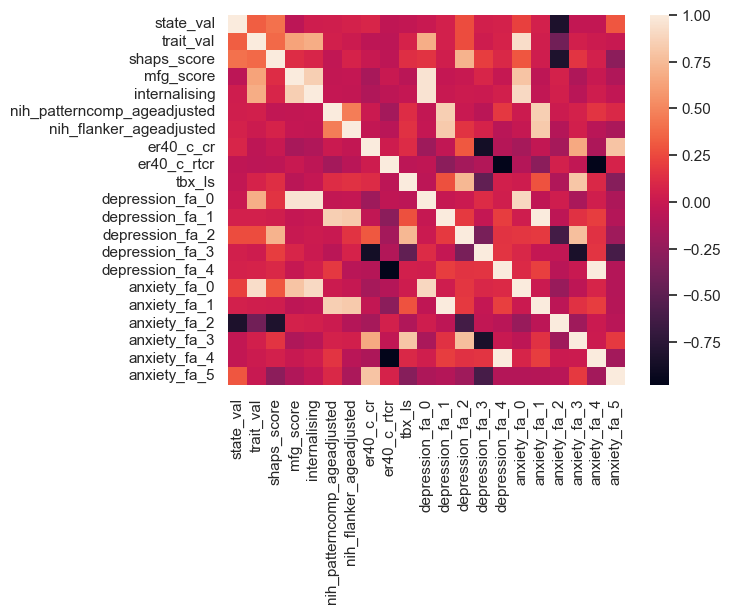

In [311]:
import seaborn as sns

sns.heatmap(
    banda[banda.columns[4:]].corr())

In [312]:
banda

,id,phenotype,sex,interview_age,state_val,trait_val,shaps_score,mfg_score,internalising,nih_patterncomp_ageadjusted,...,depression_fa_1,depression_fa_2,depression_fa_3,depression_fa_4,anxiety_fa_0,anxiety_fa_1,anxiety_fa_2,anxiety_fa_3,anxiety_fa_4,anxiety_fa_5
0,BANDA001,Control,F,184,42.0,47.0,38.000000,37.0,27.000000,93.000000,...,-0.042155,0.251971,-0.120877,-0.163709,-0.233729,-0.035143,-0.180486,0.240513,-0.162367,-0.005431
1,BANDA002,Control,F,169,46.0,41.0,38.000000,39.0,16.000000,136.000000,...,1.388582,0.185746,0.088473,-0.098502,-0.712647,1.404225,-0.268833,0.036109,-0.089314,-0.103524
2,BANDA003,Control,M,177,49.0,44.0,36.000000,33.0,4.000000,123.000000,...,0.232003,0.029979,-0.273688,-0.069756,-0.799365,0.266516,-0.476788,0.240296,-0.090085,0.235987
3,BANDA004,Control,M,188,47.0,45.0,32.000000,37.0,24.000000,125.000000,...,1.934310,0.363853,-0.226251,-0.130496,-0.448869,1.961125,-0.052684,0.464129,-0.111674,-0.046189
4,BANDA005,Control,M,191,42.0,33.0,36.000000,33.0,4.000000,99.000000,...,-0.015533,0.333321,-0.324024,-0.059820,-1.503996,0.005018,0.025579,0.473758,-0.042807,0.077459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,BANDA210,Anxiety,M,193,54.0,52.0,55.000000,38.0,35.000000,91.000000,...,-0.694543,1.136143,0.039565,-0.104772,0.363956,-0.703921,-2.095537,0.328991,-0.144259,-0.062011
199,BANDA211,Depression,F,196,56.0,60.0,52.000000,79.0,54.000000,133.000000,...,0.636288,0.582847,0.421247,0.156098,1.259663,0.624893,-1.863861,-0.260295,0.117423,-0.105325
200,BANDA212,Depression,F,186,61.0,67.0,52.000000,80.0,89.000000,87.000000,...,-0.044349,0.777247,0.171083,-0.193919,2.099463,-0.080488,-2.248119,-0.058923,-0.241177,0.009216
201,BANDA213,Depression,F,184,56.0,65.0,51.000000,77.0,92.000000,119.000000,...,0.612303,0.872768,0.035987,0.153672,2.051960,0.573007,-1.815562,0.159704,0.096935,0.041262


In [313]:
cols_to_correlate = banda_df_scored.columns[4:]
for col in cols_to_correlate:
    print(col)
    print('component anxiety:', pearsonr(banda["anxiety_fa_0"], banda[col])[0])
    print('component anxiety 1:', pearsonr(banda["anxiety_fa_1"], banda[col])[0])
    print('component depression:', pearsonr(banda["depression_fa_0"], banda[col])[0])
    print('component depression 1:', pearsonr(banda["depression_fa_1"], banda[col])[0])
    print()

state_val
component anxiety: 0.21685962765914538
component anxiety 1: 0.056622842896686267
component depression: 0.0010954973000142922
component depression 1: 0.050500177623524864

trait_val
component anxiety: 0.9227912188850187
component anxiety 1: 0.04043639266269033
component depression: 0.6902204279074093
component depression 1: 0.05540650006793294

shaps_score
component anxiety: 0.29989617711353983
component anxiety 1: 0.03252320330931402
component depression: 0.15502569262419674
component depression 1: 0.037602288714363795

mfg_score
component anxiety: 0.7979300168921889
component anxiety 1: -0.05103214178625456
component depression: 0.961361011741521
component depression 1: -0.025306105531999842

internalising
component anxiety: 0.9018871436811182
component anxiety 1: -0.038980795725433975
component depression: 0.9549985167151351
component depression 1: -0.009502249137294383

nih_patterncomp_ageadjusted
component anxiety: 0.014767101516698945
component anxiety 1: 0.8499625384700

## Nbridge

In [314]:
banda['sex'] = banda['sex'].apply(lambda x: 0 if x == 'F' else 1)
banda['interview_age'] = banda['interview_age'].astype('float')

In [315]:
banda[banda.columns[2:]].dtypes

sex                              int64
interview_age                  float64
state_val                      float64
trait_val                      float64
shaps_score                    float64
mfg_score                      float64
internalising                  float64
nih_patterncomp_ageadjusted    float64
nih_flanker_ageadjusted        float64
er40_c_cr                      float64
er40_c_rtcr                    float64
tbx_ls                         float64
depression_fa_0                float64
depression_fa_1                float64
depression_fa_2                float64
depression_fa_3                float64
depression_fa_4                float64
anxiety_fa_0                   float64
anxiety_fa_1                   float64
anxiety_fa_2                   float64
anxiety_fa_3                   float64
anxiety_fa_4                   float64
anxiety_fa_5                   float64
dtype: object

In [316]:
decomp = PCA()
banda.columns = banda.columns.astype(str)
pca_df = banda[['sex', 'interview_age', 'depression_fa_0', 'depression_fa_1',
       'depression_fa_2', 'depression_fa_3', 'depression_fa_4', 'anxiety_fa_0',
       'anxiety_fa_1', 'anxiety_fa_2', 'anxiety_fa_3', 'anxiety_fa_4',
       'anxiety_fa_5']]
scaled_data = scaling(pca_df)
alt = decomp.fit_transform(scaled_data)

In [317]:
null_distro = permutation_null_distro(pca_df, n_perms=5000)
crti_val = get_crit_val(len(decomp.explained_variance_ratio_), null_distro)
alt_val = get_explained_ratio(decomp, len(decomp.explained_variance_ratio_))

In [318]:
comp = get_significant_components(crti_val, alt_val)
print(f"Component(s) {comp} are sigifiniciant components")

Component(s) [0, 1, 2, 3, 4] are sigifiniciant components


In [319]:
scaled_data = scaling(pca_df)
alt_pca = PCA(n_components=5).fit_transform(scaled_data.values)

In [320]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

scaled_data = scaling(banda[banda.columns[2:]])
alt_pca = PCA(n_components=5).fit_transform(scaled_data.values)
cluster_range = range(2, 11)
for cluster_n in cluster_range:
    clusterer = KMeans(n_clusters=cluster_n, random_state=10)
    cluster_labels = clusterer.fit_predict(alt_pca)
    silhouette_avg = silhouette_score(alt_pca, cluster_labels)
    print("For n_clusters =", cluster_n, "The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.14357241265930304
For n_clusters = 3 The average silhouette_score is : 0.16590806020886187
For n_clusters = 4 The average silhouette_score is : 0.16917427330211535
For n_clusters = 5 The average silhouette_score is : 0.19630289996918543
For n_clusters = 6 The average silhouette_score is : 0.21262893757136284
For n_clusters = 7 The average silhouette_score is : 0.19298185704302703
For n_clusters = 8 The average silhouette_score is : 0.1786999687201273
For n_clusters = 9 The average silhouette_score is : 0.1646474308896063
For n_clusters = 10 The average silhouette_score is : 0.16827140638095808


In [321]:
alt_pca.shape

(203, 5)

/Users/mszdjh3/envs/global/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


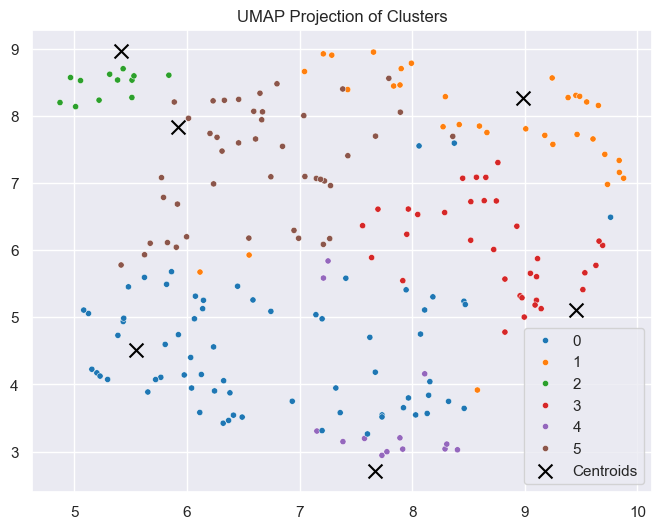

In [322]:
import umap.umap_ as umap
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme("notebook")
from sklearn.cluster import KMeans

# Fit KMeans on the original 6D data
n_clusters = 6
kmeans = KMeans(init="k-means++", n_clusters=n_clusters, n_init=10, random_state=42)
labels = kmeans.fit_predict(alt_pca)  # Cluster in 6D

# Reduce to 2D for visualization
umap_reducer = umap.UMAP(n_components=2, random_state=42)
reduced_data = umap_reducer.fit_transform(alt_pca)
# Transform centroids using the same UMAP reducer
centroids_2d = umap_reducer.transform(kmeans.cluster_centers_)

# Plot clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=labels, palette="tab10", s=20)

# Plot corrected centroids
plt.scatter(
    centroids_2d[:, 0], centroids_2d[:, 1],
    c='black', marker='x', s=100, label="Centroids"
)

plt.title("UMAP Projection of Clusters")
plt.legend()
plt.show()



<Axes: >

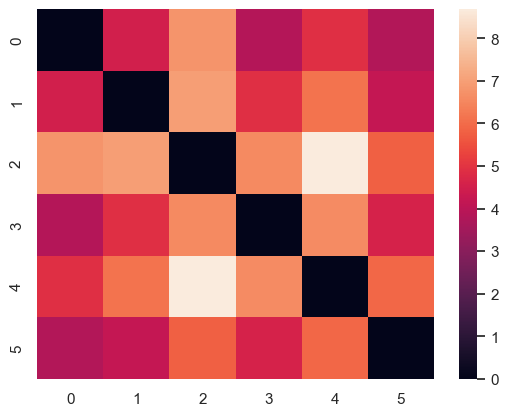

In [323]:
from scipy.spatial.distance import cdist, squareform
distance_matrix = cdist(kmeans.cluster_centers_, kmeans.cluster_centers_, metric='euclidean')

sns.heatmap(distance_matrix)

In [324]:
from scipy.cluster.hierarchy import linkage, fcluster

condensed_distance_matrix = squareform(distance_matrix)
Z = linkage(distance_matrix, method='average')
# Now cut the dendrogram to form 3 clusters
clusters = fcluster(Z, t=3, criterion='maxclust')

# Get the new cluster centers (mean of the old cluster centers in each merged cluster)
merged_centers = []
for cluster_id in range(1, 4):  # We want 3 clusters
    cluster_centers = kmeans.cluster_centers_[clusters == cluster_id]
    merged_center = np.mean(cluster_centers, axis=0)
    merged_centers.append(merged_center)

merged_centers = np.array(merged_centers)

print("Merged cluster centers:")
print(merged_centers)

Merged cluster centers:
[[ 0.20795101  0.01915256 -0.51848882  0.05435004 -0.30765414]
 [-2.80678435  2.05430863  1.80345711  2.58897616  1.40574105]
 [ 3.89329968 -1.29586783  1.54652316 -1.27562845  3.48197717]]


/var/folders/4_/q2h2ppfd6ps35fw_6kl5x9m40000gr/T/ipykernel_33191/2486032242.py:4: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(distance_matrix, method='average')


In [325]:
import matplotlib.pyplot as plt

reduced_data = PCA(n_components=2).fit_transform(alt_pca)
n_digits = 6
kmeans = KMeans(init="k-means++", n_clusters=n_digits, n_init=4)
kmeans.fit(alt_pca)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = 0.02  # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap=plt.cm.Pastel1,
    aspect="auto",
    origin="lower",
)

plt.plot(reduced_data[:, 0], reduced_data[:, 1], "k.", markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=169,
    linewidths=3,
    color="b",
    zorder=10,
)
plt.title(
    "K-means clustering on data\n"
)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

ValueError: X has 2 features, but KMeans is expecting 5 features as input.

In [ ]:
banda['group'] = kmeans.labels_
banda

,id,phenotype,sex,interview_age,state_val,trait_val,shaps_score,mfg_score,internalising,nih_patterncomp_ageadjusted,...,depression_fa_2,depression_fa_3,depression_fa_4,anxiety_fa_0,anxiety_fa_1,anxiety_fa_2,anxiety_fa_3,anxiety_fa_4,anxiety_fa_5,group
0,BANDA001,Control,0,184.0,42.0,47.0,38.000000,37.0,27.000000,93.000000,...,0.251971,-0.120877,-0.163709,-0.233729,-0.035143,-0.180486,0.240513,-0.162367,-0.005431,0
1,BANDA002,Control,0,169.0,46.0,41.0,38.000000,39.0,16.000000,136.000000,...,0.185746,0.088473,-0.098502,-0.712647,1.404225,-0.268833,0.036109,-0.089314,-0.103524,3
2,BANDA003,Control,1,177.0,49.0,44.0,36.000000,33.0,4.000000,123.000000,...,0.029979,-0.273688,-0.069756,-0.799365,0.266516,-0.476788,0.240296,-0.090085,0.235987,0
3,BANDA004,Control,1,188.0,47.0,45.0,32.000000,37.0,24.000000,125.000000,...,0.363853,-0.226251,-0.130496,-0.448869,1.961125,-0.052684,0.464129,-0.111674,-0.046189,3
4,BANDA005,Control,1,191.0,42.0,33.0,36.000000,33.0,4.000000,99.000000,...,0.333321,-0.324024,-0.059820,-1.503996,0.005018,0.025579,0.473758,-0.042807,0.077459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,BANDA210,Anxiety,1,193.0,54.0,52.0,55.000000,38.0,35.000000,91.000000,...,1.136143,0.039565,-0.104772,0.363956,-0.703921,-2.095537,0.328991,-0.144259,-0.062011,2
199,BANDA211,Depression,0,196.0,56.0,60.0,52.000000,79.0,54.000000,133.000000,...,0.582847,0.421247,0.156098,1.259663,0.624893,-1.863861,-0.260295,0.117423,-0.105325,2
200,BANDA212,Depression,0,186.0,61.0,67.0,52.000000,80.0,89.000000,87.000000,...,0.777247,0.171083,-0.193919,2.099463,-0.080488,-2.248119,-0.058923,-0.241177,0.009216,2
201,BANDA213,Depression,0,184.0,56.0,65.0,51.000000,77.0,92.000000,119.000000,...,0.872768,0.035987,0.153672,2.051960,0.573007,-1.815562,0.159704,0.096935,0.041262,2


In [ ]:
group = banda.groupby("group")
cols = ['sex', 'interview_age', 'state_val', 'trait_val', 'shaps_score',
       'mfg_score', 'internalising', 'nih_patterncomp_ageadjusted',
       'nih_flanker_ageadjusted', 'er40_c_cr', 'er40_c_rtcr', 'tbx_ls']
numbers = group[cols].count()['sex'].rename("Count")
phenotype = group['phenotype'].unique().rename("phenotype")
pd.concat([numbers, phenotype, group[cols].mean(),], axis=1)

,Count,phenotype,sex,interview_age,state_val,trait_val,shaps_score,mfg_score,internalising,nih_patterncomp_ageadjusted,nih_flanker_ageadjusted,er40_c_cr,er40_c_rtcr,tbx_ls
group,,,,,,,,,,,,,,
0,67,"[Control, Depression, Anxiety]",0.477612,182.149254,43.253731,42.388060,35.805970,40.164179,19.462687,97.298507,84.701493,36.701493,1723.029851,19.388060
1,33,"[Control, Anxiety, Depression]",0.212121,183.666667,41.303030,48.030303,34.909091,58.484848,47.030303,101.303030,85.303030,31.545455,1665.030303,17.060606
2,12,"[Control, Depression, Anxiety]",0.416667,187.166667,55.416667,59.416667,52.166667,59.833333,50.416667,106.886612,95.898907,35.250000,1761.833333,19.265027
3,34,"[Control, Anxiety, Depression]",0.470588,187.735294,42.941176,45.617647,35.352941,47.176471,32.823529,129.529412,107.382353,35.558824,1591.411765,20.058824
4,13,"[Control, Anxiety, Depression]",0.384615,180.538462,41.461538,43.923077,32.846154,44.538462,27.615385,96.769231,88.846154,35.538462,2583.923077,18.153846
5,44,"[Depression, Anxiety]",0.159091,189.795455,41.922654,51.909457,36.447127,66.357405,65.481768,99.967581,81.886903,36.586144,1735.130865,19.725988


In [ ]:
pd.concat([group[['sex', 'interview_age', 'state_val', 'trait_val', 'shaps_score',
       'mfg_score', 'internalising', 'nih_patterncomp_ageadjusted',
       'nih_flanker_ageadjusted', 'er40_c_cr', 'er40_c_rtcr', 'tbx_ls']].mean(), numbers], axis=1)

,sex,interview_age,state_val,trait_val,shaps_score,mfg_score,internalising,nih_patterncomp_ageadjusted,nih_flanker_ageadjusted,er40_c_cr,er40_c_rtcr,tbx_ls,Count
group,,,,,,,,,,,,,
0,0.477612,182.149254,43.253731,42.388060,35.805970,40.164179,19.462687,97.298507,84.701493,36.701493,1723.029851,19.388060,67
1,0.212121,183.666667,41.303030,48.030303,34.909091,58.484848,47.030303,101.303030,85.303030,31.545455,1665.030303,17.060606,33
2,0.416667,187.166667,55.416667,59.416667,52.166667,59.833333,50.416667,106.886612,95.898907,35.250000,1761.833333,19.265027,12
3,0.470588,187.735294,42.941176,45.617647,35.352941,47.176471,32.823529,129.529412,107.382353,35.558824,1591.411765,20.058824,34
4,0.384615,180.538462,41.461538,43.923077,32.846154,44.538462,27.615385,96.769231,88.846154,35.538462,2583.923077,18.153846,13
5,0.159091,189.795455,41.922654,51.909457,36.447127,66.357405,65.481768,99.967581,81.886903,36.586144,1735.130865,19.725988,44


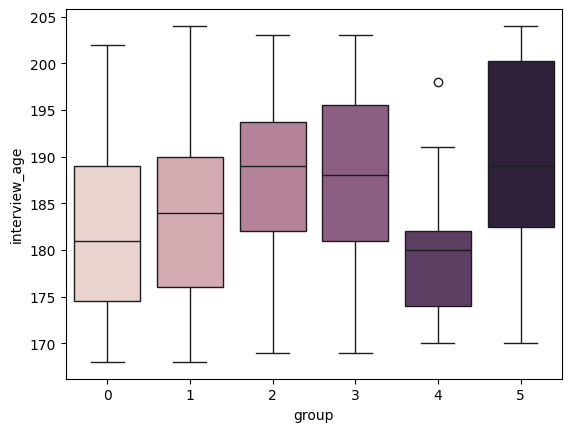

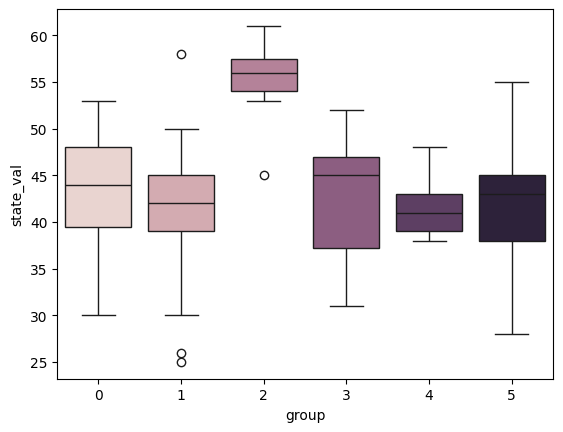

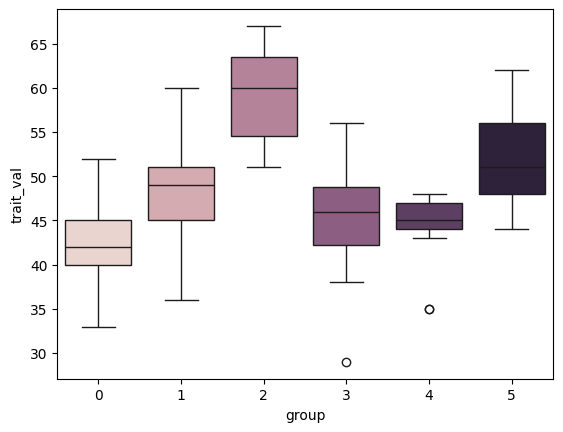

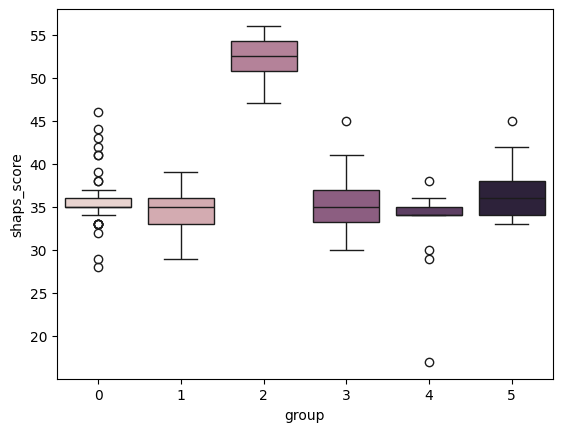

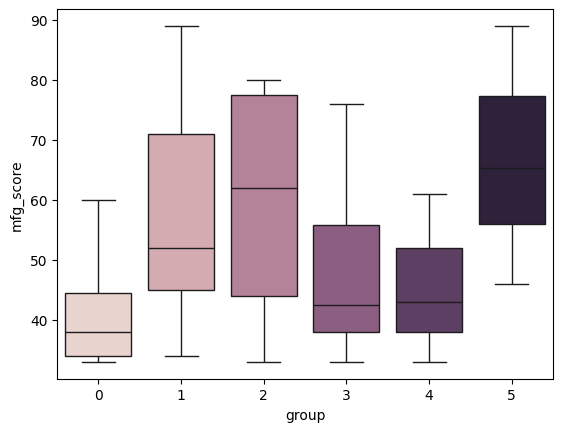

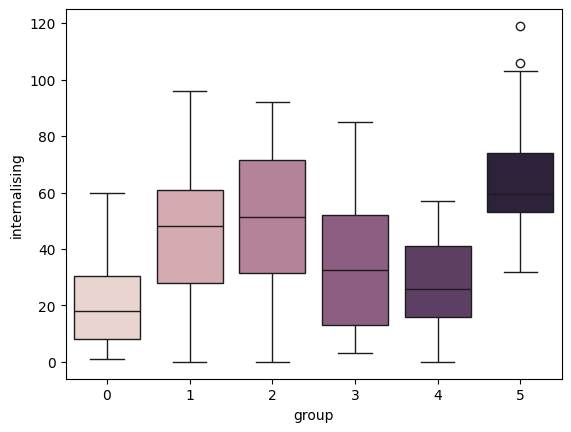

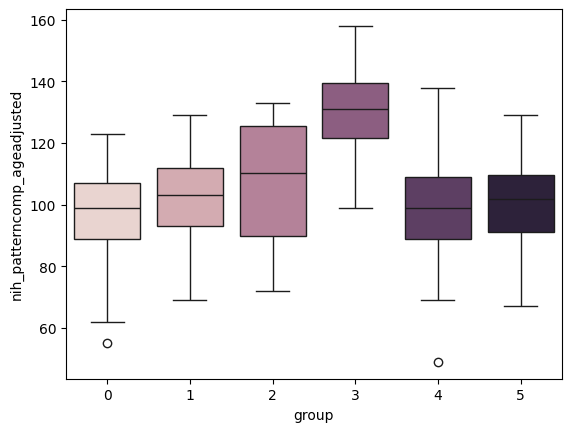

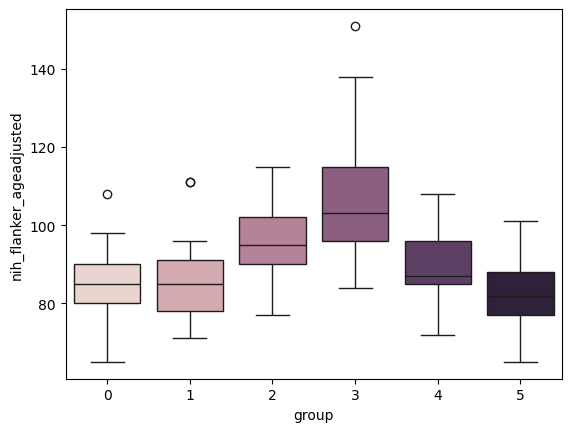

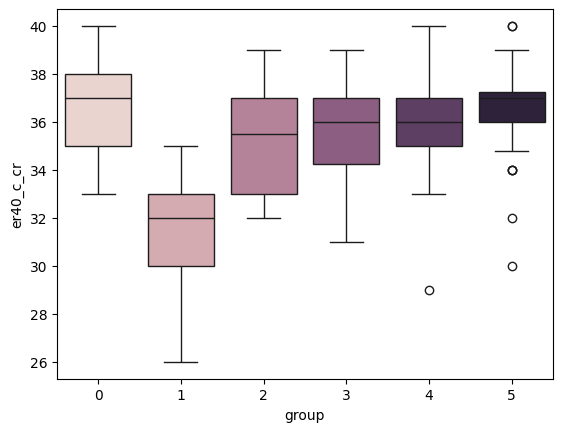

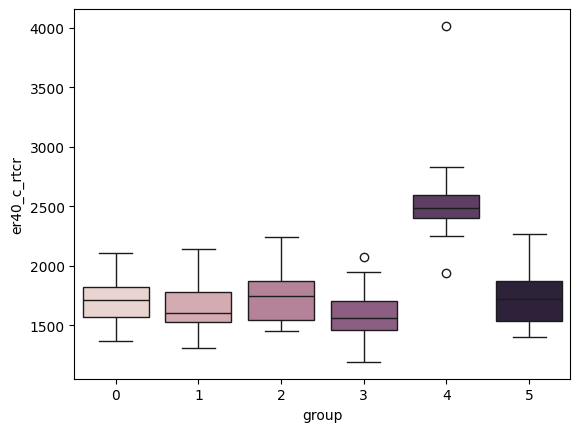

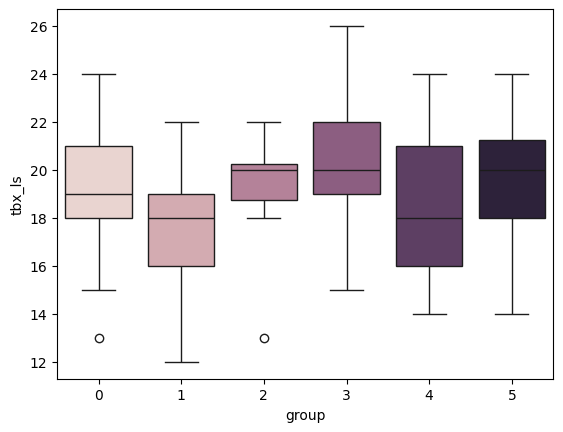

In [ ]:
for val in banda[banda.columns[3:14]]:
    if val == "group":
        continue
    plot = sns.boxplot(data=banda, x='group', y=val, hue='group')
    plot.get_legend().remove()
    plt.show()